In [1]:
%matplotlib widget

In [6]:
from bmcs_cross_section.mkappa import MKappa
from bmcs_beam.bending.deflection_profile import DeflectionProfile
from bmcs_beam.beam_config.beam_design import BeamDesign
from bmcs_cross_section.cs_design.cs_shape import TShape

import numpy as np
import pandas as pd
import sympy as sp
import matplotlib.pyplot as plt

from bmcs_beam.bending.deflection_profile import DeflectionProfile
import bmcs_utils.api as bu


In [7]:
def map_and_assign_params_for_t_section(
        mc, # MKappa instance for which the params should be applied
        b, h, E, E_s, f_sy, eps_cr, rho, beta_tu, v_f, omega, psi, mu, alpha, lambda_cu, o, zeta):
    """This function map the params of the rectangular section from the type of the paper
    to the type of the model and assigns the values"""
    t_shape = TShape(B_f = b, B_w = o*b, H_w = (1-zeta)*h)
    mc.cross_section_shape = t_shape
    
    mc.E_cc=E
    mc.E_ct=E # SUPPOSED equal to E_cc!!
    mc.mu=mu
    mc.eps_cr=eps_cr
    mc.eps_cy=omega * eps_cr
    mc.eps_cu=lambda_cu * eps_cr
    mc.eps_tu=beta_tu * eps_cr
    mc.eps_sy_j=[f_sy / E_s] # or eps_sy_j=psi * eps_cr,
    mc.E_j=[E_s]
    mc.z_j=[h * (1 - alpha)]
    mc.A_j=[rho * b * h]
    

    
def plot_Fw_ver(mc, ver_data):
    fig, ax = plt.subplots(1,1)

    dp = DeflectionProfile(mc=mc)
    w_ = ver_data[0]
    F_ = ver_data[1]
    
    F, w = dp.get_Fw()
    ax.plot(w, F, c= 'blue', label= 'bmcs_deflection')

    ax.plot(w_, F_, c= 'red', label= 'Experiment')
    ax.legend()
    plt.show()

### 1. Verification with Qi et al. (2016), https://doi.org/10.1002/suco.201500191


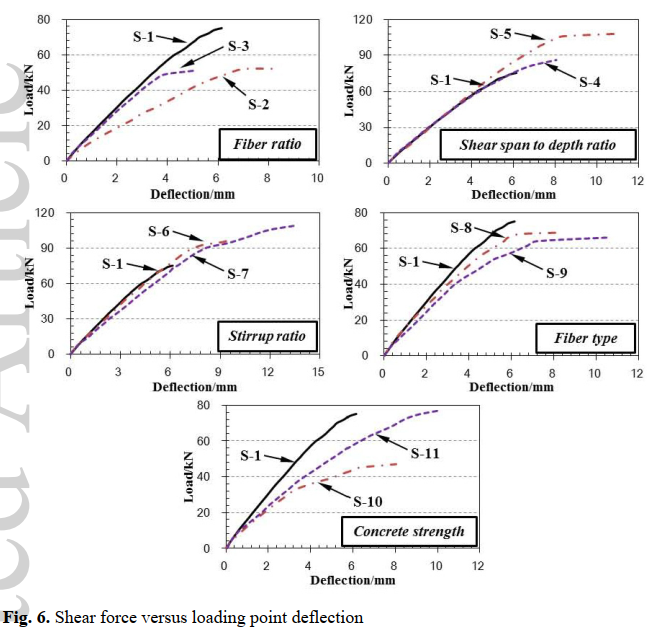

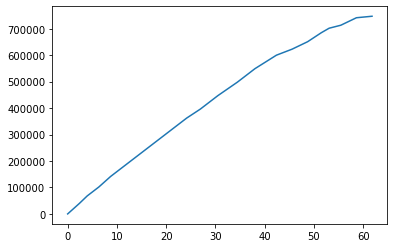

In [8]:
%matplotlib inline

excel_file = r".\verification_data\yao20_yao_mobasher\figure_14\Qi_2016.xlsx"
data = pd.read_excel(excel_file)
w_= data['S_1_exp_w'] ; f_= data['S_1_exp_F']; ver_data = [w_, f_]; plt.plot(w_,f_);

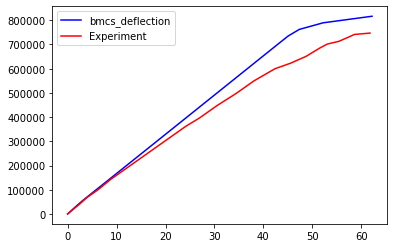

In [9]:
mc = MKappa(n_m=100, n_kappa = 100)
mc.kappa_slider = 0.00001
mc.low_kappa = 0
mc.high_kappa = 0.0001
map_and_assign_params_for_t_section(mc,
            beta_tu = 160,  # SUPPOSED because it's missing
            b = 284,
            h = 298,
            E = 36500,
            E_s = 200000,
            f_sy = 761,
            eps_cr = 0.000140,
            rho = 0.0496,
            v_f = 0.02,
            omega = 22.7,
            psi = 27.2,
            mu = 0.3,
            alpha = 0.81,
            lambda_cu = 25, 
            o = 0.33, 
            zeta = 0.25)

plot_Fw_ver(mc, ver_data)